In [34]:
import os
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfea
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.io.shapereader as shapereader

In [45]:
h08dir = '/home/kajiyama/H08/H08_20230612'
SUF = '.gl5'
dtype = 'float32'
ax, by = 4320, 2160
gl5shape = (by, ax)

# region
tag = '.tk5'
city_num = 1
#
one = 138
two = 141
three = 34
four = 38
#
one = 138
two = 141
three = 35
four = 37
#
img_extent = (one, two, three, four)
resolution = 12
nx = (two-one)*resolution
ny = (four-three)*resolution
rgnshape = (ny, nx)
upperindex = (90-four)*resolution
lowerindex = (90-three)*resolution
leftindex = (180+one)*resolution
rightindex = (180+two)*resolution
print(upperindex, lowerindex, leftindex, rightindex)

636 660 3816 3852


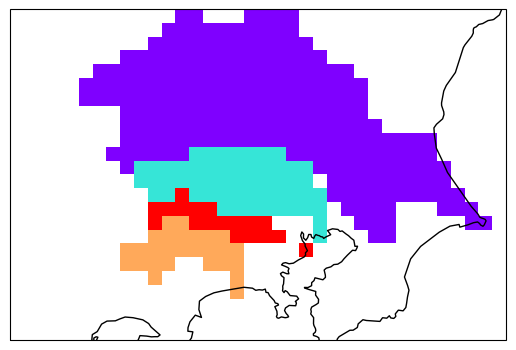

In [46]:
# rivnum file
ctymsk = np.fromfile(f'{h08dir}/map/dat/cty_msk_/city_{city_num:08}{SUF}', dtype=dtype).reshape(gl5shape)
gesui = np.fromfile(f'{h08dir}/map/dat/cty_swg_/city_{city_num:08}{SUF}', dtype=dtype).reshape(gl5shape)
rivnum = np.fromfile(f'{h08dir}/map/out/riv_num_/rivnum.CAMA{SUF}', dtype=dtype).reshape(gl5shape)
ctymsk_cropped = ctymsk[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]
gesui_cropped = gesui[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]
rivnum_cropped = rivnum[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]

# gesui rivnum
rivmou_reduced = np.where(gesui_cropped == 1, rivnum_cropped, 0)

#
unique_values, counts = np.unique(rivmou_reduced, return_counts=True)
rivnum_reduced = np.zeros(rivnum_cropped.shape)
for id in unique_values:
    if id != 0:
        matching_positions = np.where(rivnum_cropped == id)
        rivnum_reduced[matching_positions[0], matching_positions[1]] = id

#
rivnum_reduced = np.ma.masked_where(rivnum_reduced == 0, rivnum_reduced)
#
fig = plt.figure()
projection = ccrs.PlateCarree(central_longitude=0)
ax = plt.subplot(projection=projection)
ax.coastlines()
im = ax.imshow(rivnum_reduced, extent=img_extent, transform=projection, cmap='rainbow')

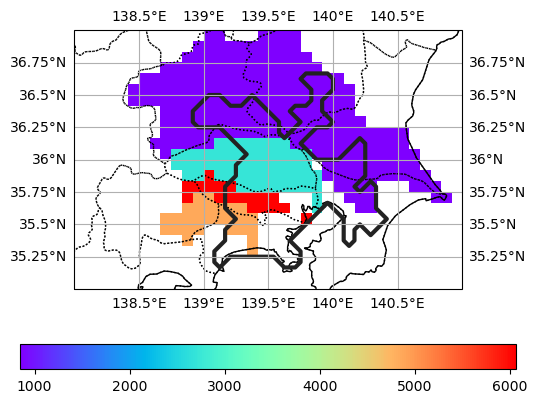

In [47]:
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.add_feature(cfea.LAKES.with_scale('50m'))
ax.gridlines(draw_labels=True)
ct = ax.contour(ctymsk_cropped, levels=[0.5], colors='#222222', linewidths=3, origin='upper', extent=img_extent, transform=projection)
im = ax.imshow(rivnum_reduced, origin='upper', extent=img_extent, transform=projection, cmap='rainbow')
fig.colorbar(im, ax=ax, orientation='horizontal')

# tokyo shapefile
shpfilename = shapereader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces')
provinces = shapereader.Reader(shpfilename).records()
provinces_of_japan = filter(
    lambda province: province.attributes['admin'] == 'Japan', provinces)
for province in provinces_of_japan:
    geometry = province.geometry
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='none', linestyle=':', zorder=0)